# Tutorial 2: Feature importance, and some scatter plots (RG)

---

The aim of this notebook, is to reorder the 2074 columns according to their importance

First, let us recall the data from the previous notebook

In [1]:
%store -r df_input_RG
%store -r y_RG
%store -r df_RG


<b><i> Data splitting </i></b> 

In [2]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_RG, y_RG, test_size = 0.3, random_state=3, stratify=y_RG) # train and valid sets

In [3]:
print(Xtrain.shape)
print(Xtest.shape)

(393, 2074)
(169, 2074)


---

<b><i> Permutation Importance </i></b> 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from random import *
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
featImp_RG = [] # an empty list to store the important features

In [ ]:
for i in range (1000): # we will take the average of 1000 permutations, with different sizes and random splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.2, 0.5)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( np.array(Xtrain), np.array(Ytrain), test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=50, random_state=0, n_jobs = -1)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XvalidPer, YvalidPer, scoring='precision_macro', n_repeats = 10, n_jobs = -1)
    importance = results.importances_mean
    # print(importance)

    featImp_RG.append(importance)

itr: 0
Train shape: (207, 2074)
Valid shape: (186, 2074)

itr: 1
Train shape: (265, 2074)
Valid shape: (128, 2074)

itr: 2
Train shape: (216, 2074)
Valid shape: (177, 2074)

itr: 3
Train shape: (279, 2074)
Valid shape: (114, 2074)

itr: 4
Train shape: (299, 2074)
Valid shape: (94, 2074)

itr: 5
Train shape: (301, 2074)
Valid shape: (92, 2074)

itr: 6
Train shape: (253, 2074)
Valid shape: (140, 2074)

itr: 7
Train shape: (283, 2074)
Valid shape: (110, 2074)

itr: 8
Train shape: (198, 2074)
Valid shape: (195, 2074)

itr: 9
Train shape: (282, 2074)
Valid shape: (111, 2074)

itr: 10
Train shape: (306, 2074)
Valid shape: (87, 2074)

itr: 11
Train shape: (254, 2074)
Valid shape: (139, 2074)

itr: 12
Train shape: (214, 2074)
Valid shape: (179, 2074)

itr: 13
Train shape: (274, 2074)
Valid shape: (119, 2074)



In [ ]:
%store featImp_RG

In [8]:
%store -r featImp_RG
np.array(featImp_RG).shape

(1000, 2074)

In [9]:
arrimp = np.array(featImp_RG).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1316 1284 1093 1290   60 1034 1068 1029 1070 1107]


---

<b><i> Graph importance</i></b> 

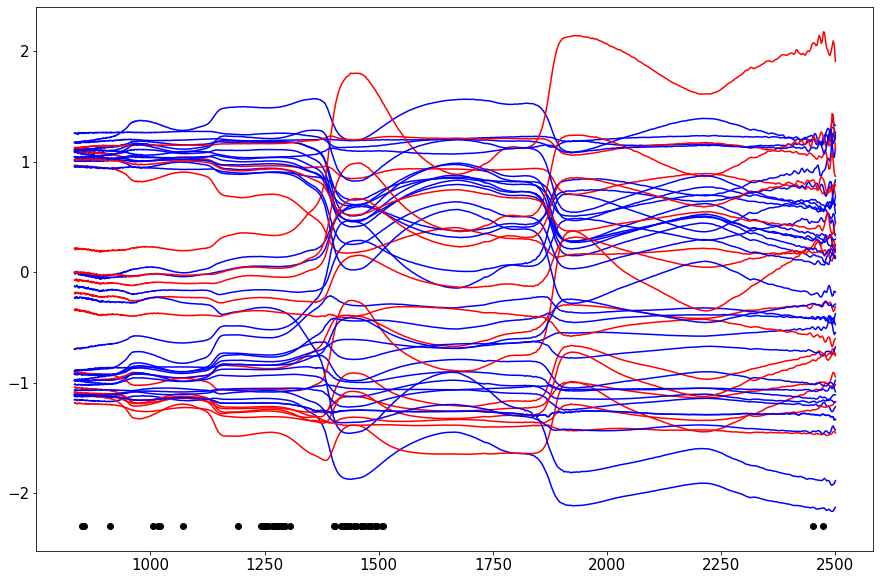

In [12]:
n = 50
rand  = np.random.randint(len(y_RG), size= n)

plt.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

for t in range (n):
    i = rand[t]
    lineSpec =  np.array(df_input_RG.iloc[i]).flatten()
    
    if y_RG[i] == 'S':
        plt.plot(np.array(df_input_RG.columns), lineSpec, color = 'red')
    if y_RG[i] == 'B':
        plt.plot(np.array(df_input_RG.columns), lineSpec, color = 'blue')

plt.scatter(df_input_RG.columns[sorted_idx][-n:], arrimp[sorted_idx][-n:]-2.3, color = 'black')
plt.show()

---

<b><i> Scatter plt </i></b> 

In [13]:
df_perImp = pd.DataFrame()
df_perImp = df_input_RG[df_input_RG.columns[sorted_idx][-10:]]
df_perImp['Condition'] = y_RG
print(df_perImp.head(2))

   1445.173  1419.847  1285.394  1424.528   850.046  1248.864  1269.657  \
0  1.293554  1.286701 -0.136436  1.296807 -0.630967 -0.156898 -0.158953   
1  0.354792  0.371615 -0.486885  0.369980 -0.810774 -0.504256 -0.504276   

   1245.863  1270.902  1294.379 Condition  
0 -0.154983 -0.157668 -0.109653         B  
1 -0.502294 -0.503225 -0.467549         B  


/tmp/ipykernel_350671/1831016943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perImp['Condition'] = y_RG


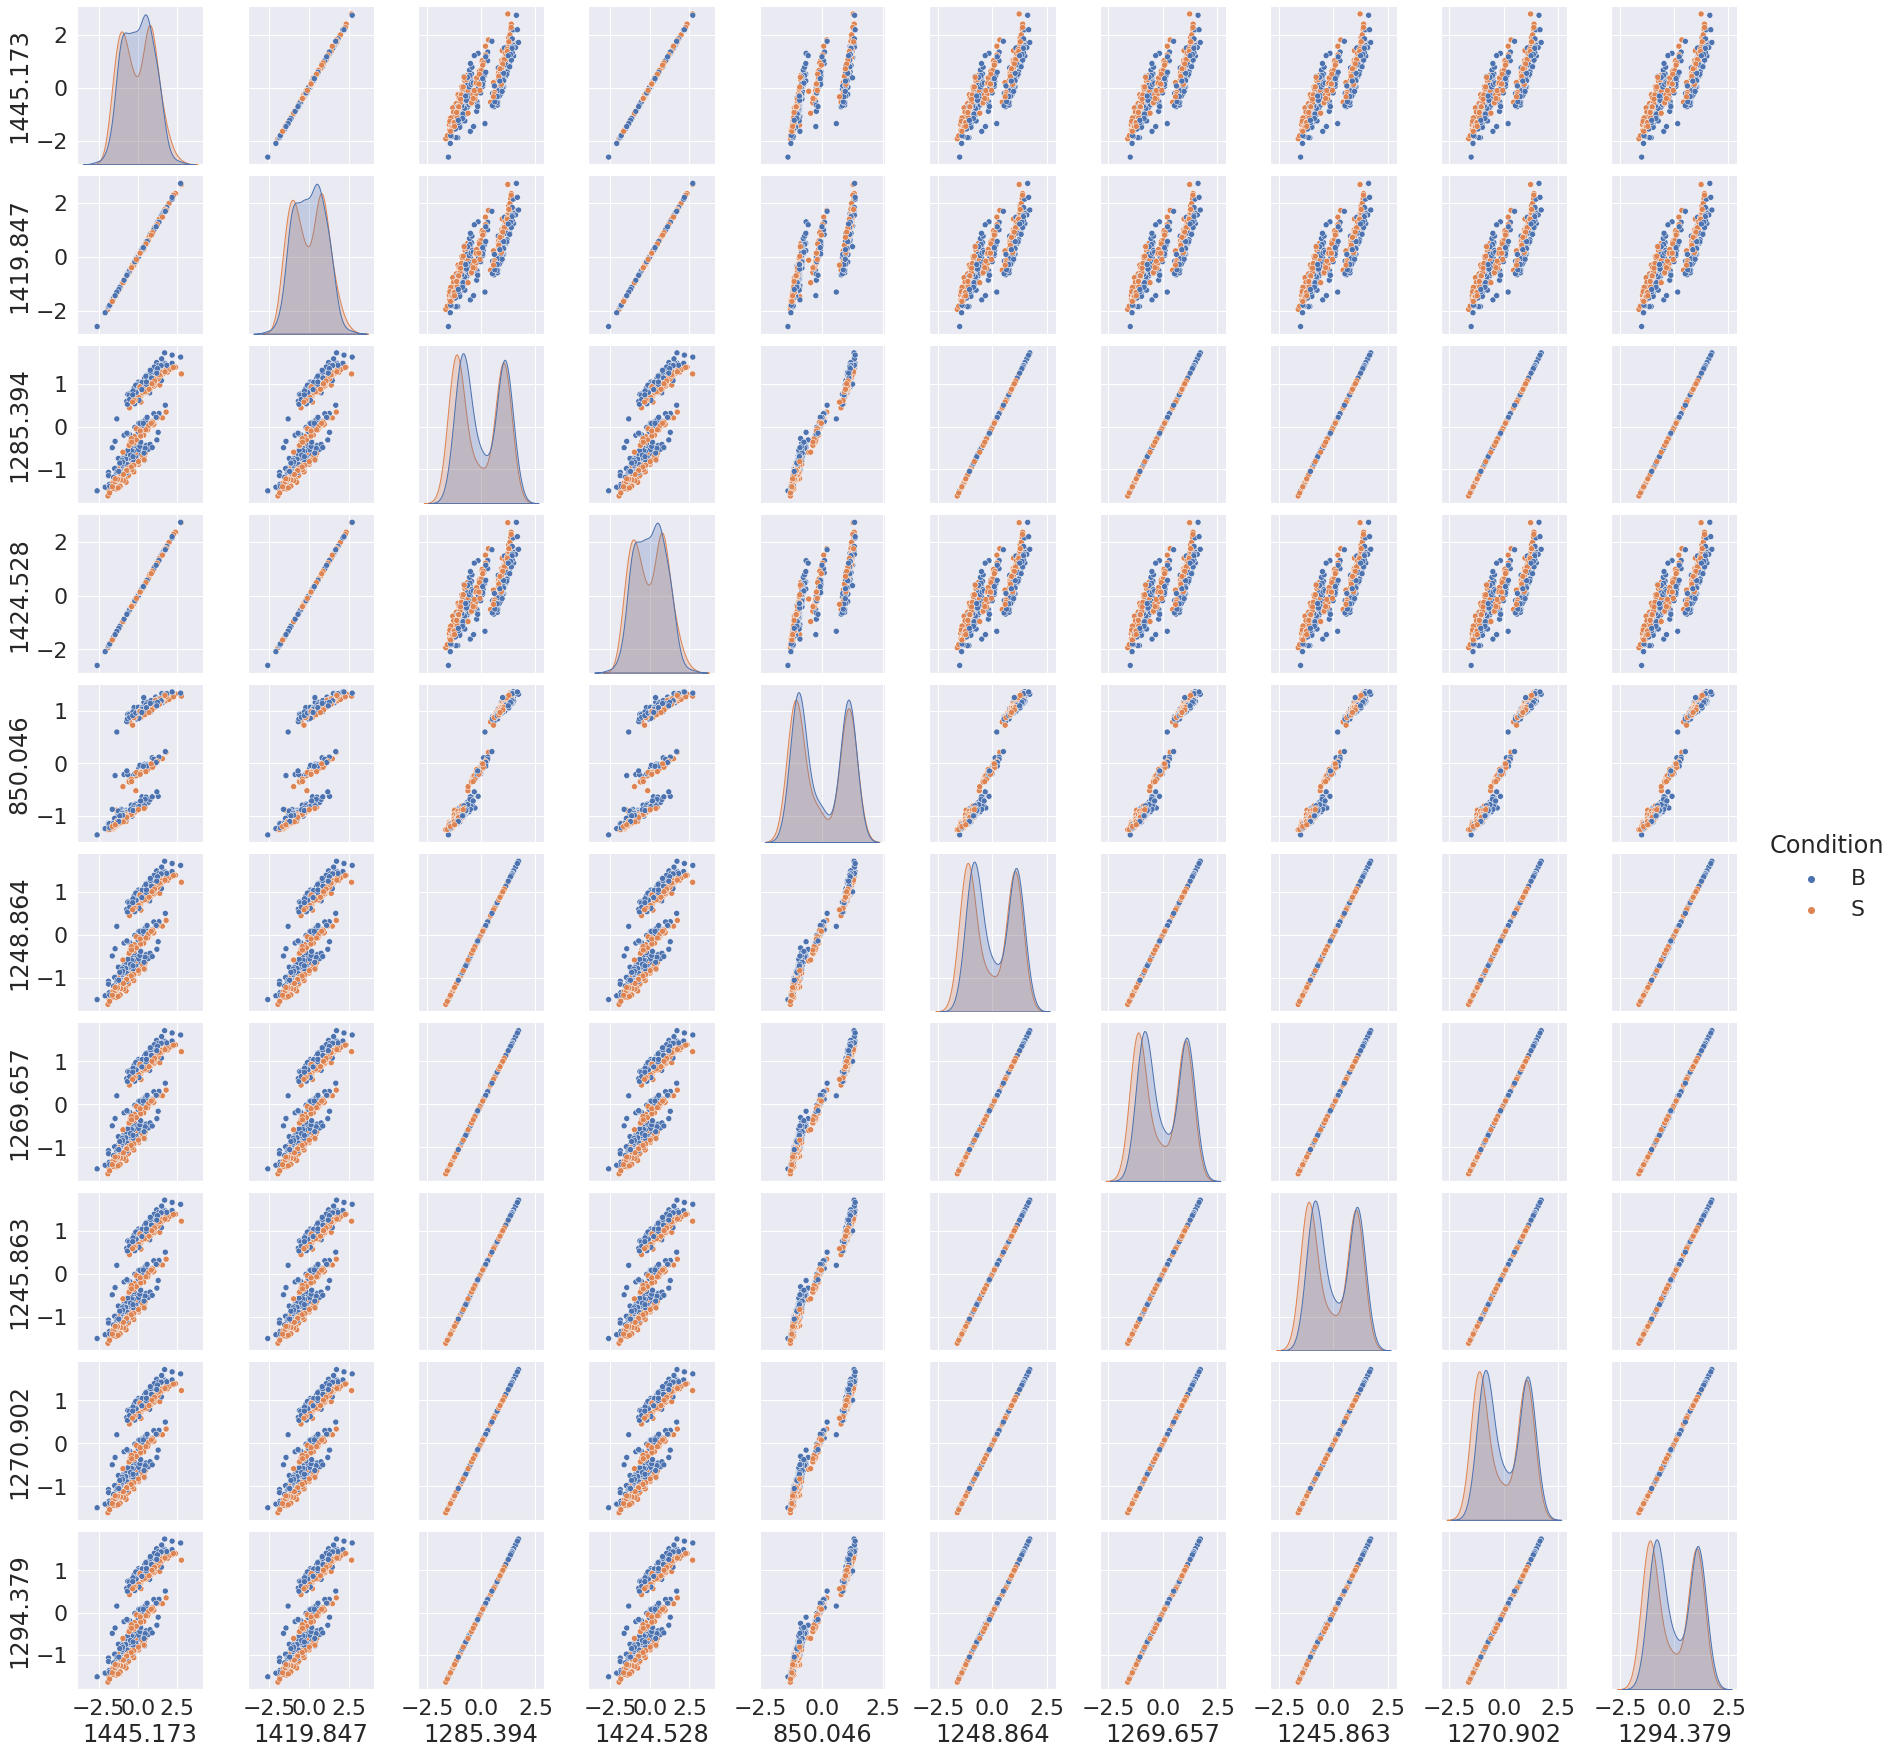

In [14]:
sns.set(font_scale=2)
sns.pairplot(df_perImp, hue="Condition")

---

#### DONE